# GLOBAL POWER PLANT DATABASE

Project Statement:
    
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database

The database includes the following indicators:
    
•	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    
•	`country_long` (text): longer form of the country designation
    
•	`name` (text): name or title of the power plant, generally in Romanized form
    
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
    
•	`capacity_mw` (number): electrical generating capacity in megawatts
    
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    
•	`primary_fuel` (text): energy source used in primary electricity generation or export
    
•	`other_fuel1` (text): energy source used in electricity generation or export
    
•	`other_fuel2` (text): energy source used in electricity generation or export
    
•	`other_fuel3` (text): energy source used in electricity generation or export
    
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
    
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
    
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
    
•	`geolocation_source` (text): attribution for geolocation information
    
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    
•	`year_of_capacity_data` (number): year the capacity information was reported
    
    
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    
    
•	`generation_data_source` (text): attribution for the reported generation information
    
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017
    
    
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013


•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 


Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


# 1. Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('database_IND.csv')

df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [3]:
df.tail()

country country_long                          name   gppd_idnr  \
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
902            0.994875           233.59665               865.4   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
902                686.5                  NaN  Central Electricity Authority   
903                  NaN                  NaN                            NaN   
904                  NaN                  NaN                            NaN   
905                  NaN                  NaN                            NaN   
906                  NaN                  NaN                            NaN   

     estimated_generation_gwh  
902                       NaN  
903                       NaN  
904                       NaN  
905                       NaN  
906                       NaN  

[5 rows x 27 columns]

In [4]:
df.sample()

country country_long                      name   gppd_idnr  capacity_mw  \
247     IND        India  Gondri Solar Power Plant  WRI1026142          5.0   

     latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
247   18.3055    76.6551        Solar         NaN         NaN  ...   

     year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
247                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
247                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019  generation_data_source  \
247                  NaN                  NaN                     NaN   

     estimated_generation_gwh  
247                       NaN  

[1 rows x 27 columns]

In [5]:
# check data shape
df.shape

(907, 27)

In [6]:
# check all variable names
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
# checking datatype of all columns
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [8]:
# checking empty spaces in dataset
for x in df.columns:
    print(df.loc[df[x]==" "])
    

Empty DataFrame
Columns: [country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh]
Index: []

[0 rows x 27 columns]
Empty DataFrame
Columns: [country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh]
Index: []

[0 rows x 27 columns]
Empty DataFrame
Columns: [country, country_long, n

In [9]:
# chekcing null values 
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

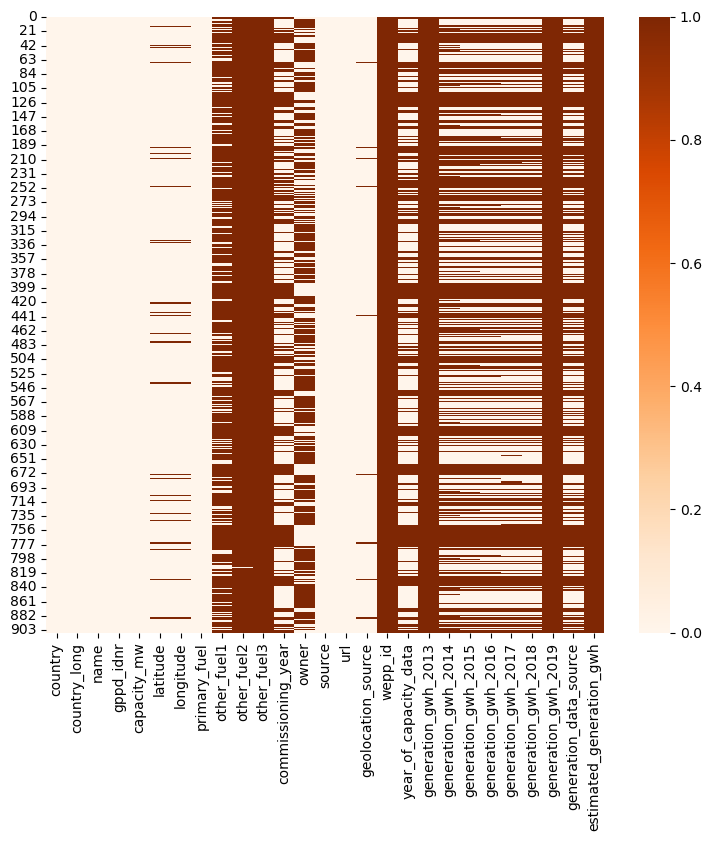

In [10]:
# Checking null values using heatmap
plt.figure(figsize=(9,8))
sns.heatmap(df.isnull(),cmap='Oranges')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [12]:
# check the duplicate
duplicate = df[df.duplicated()]
print("Duplicate rows :")

duplicate

Duplicate rows :


Empty DataFrame
Columns: [country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, other_fuel1, other_fuel2, other_fuel3, commissioning_year, owner, source, url, geolocation_source, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source, estimated_generation_gwh]
Index: []

[0 rows x 27 columns]

 So There is no Duplicate values in the dataset

In [13]:
# We are going to drop null values in other_fuel2 variable it has 906 NAN values
df.drop('other_fuel2', axis = 1, inplace = True)

In [14]:
df.drop('other_fuel3', axis = 1, inplace = True)

In [15]:
df.drop('wepp_id', axis = 1 , inplace = True)

In [16]:
df.drop('generation_gwh_2013', axis = 1 , inplace = True)

In [17]:
df.drop('generation_gwh_2019', axis = 1 , inplace = True)

In [18]:
df.drop('estimated_generation_gwh', axis = 1 , inplace  = True)

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
sim_int = SimpleImputer(strategy='mean')
sim_object = SimpleImputer(strategy='most_frequent')

In [21]:
list_int = ['latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

list_object = ['other_fuel1','owner','geolocation_source', 'generation_data_source']


In [22]:
for x in list_int:
    df[x] = sim_int.fit_transform(df[x].values.reshape(-1,1))
    

In [23]:
for x in list_object:
    df[x] = sim_object.fit_transform(df[x].values.reshape(-1,1))

In [24]:
# checking null values
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

Now, There is No Null Values in the dataset

In [25]:
# counting unique values of all columns
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  837
longitude                 828
primary_fuel                8
other_fuel1                 3
commissioning_year         74
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       372
generation_gwh_2015       397
generation_gwh_2016       404
generation_gwh_2017       409
generation_gwh_2018       411
generation_data_source      1
dtype: int64

In [26]:
# Drop the columns whcih had only 1 unique value
df.drop('country',axis = 1, inplace = True)
df.drop('country_long',axis = 1 , inplace = True)
df.drop('year_of_capacity_data', axis = 1, inplace = True)
df.drop ('generation_data_source', axis = 1 , inplace = True)

In [27]:
df.nunique()

name                   907
gppd_idnr              907
capacity_mw            361
latitude               837
longitude              828
primary_fuel             8
other_fuel1              3
commissioning_year      74
owner                  280
source                 191
url                    304
geolocation_source       3
generation_gwh_2014    372
generation_gwh_2015    397
generation_gwh_2016    404
generation_gwh_2017    409
generation_gwh_2018    411
dtype: int64

In [28]:
# checking unique values
print(df['primary_fuel'].unique())
#counting unique values
print(df['primary_fuel'].value_counts())

['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

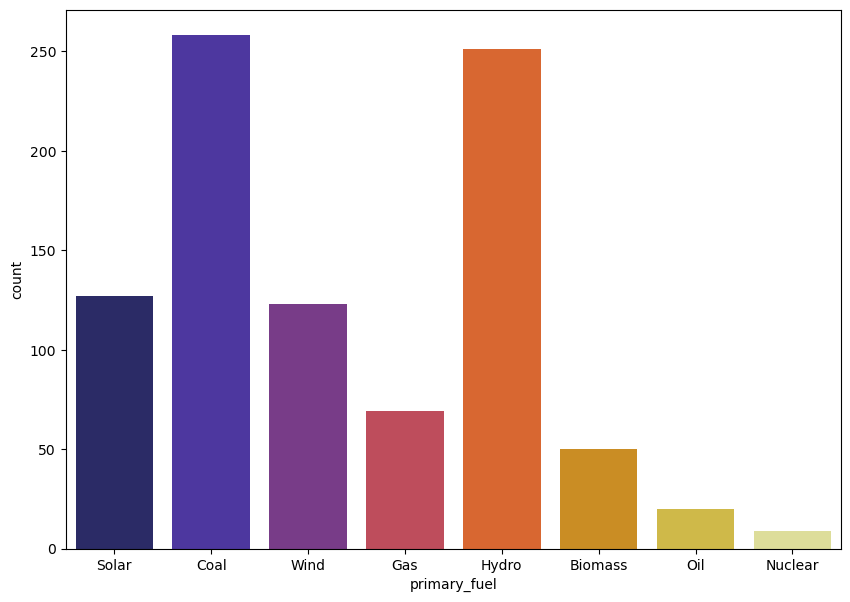

In [29]:
# count plot
plt.figure(figsize=(10,7))
sns.countplot(df['primary_fuel'], palette='CMRmap')

In [30]:
# checking unique values
print(df['other_fuel1'].unique())
#counting unique values
print(df['other_fuel1'].value_counts())

['Oil' 'Cogeneration' 'Gas']
Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

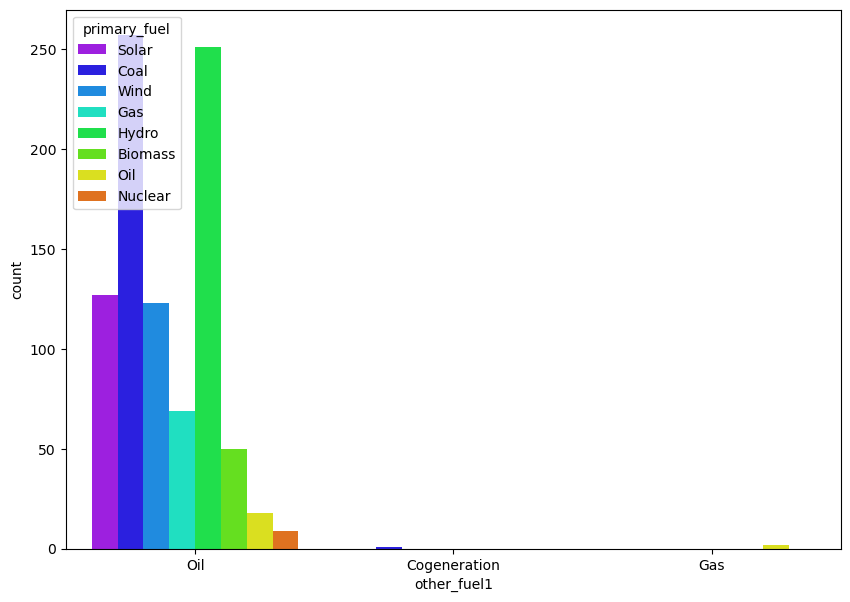

In [31]:
# count plot
plt.figure(figsize=(10,7))
sns.countplot(df['other_fuel1'], palette = 'gist_rainbow_r', hue='primary_fuel',data=df)

In [32]:
# checking unique values
print(df['geolocation_source'].unique())
#counting unique values
print(df['geolocation_source'].value_counts())

['National Renewable Energy Laboratory' 'WRI' 'Industry About']
WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

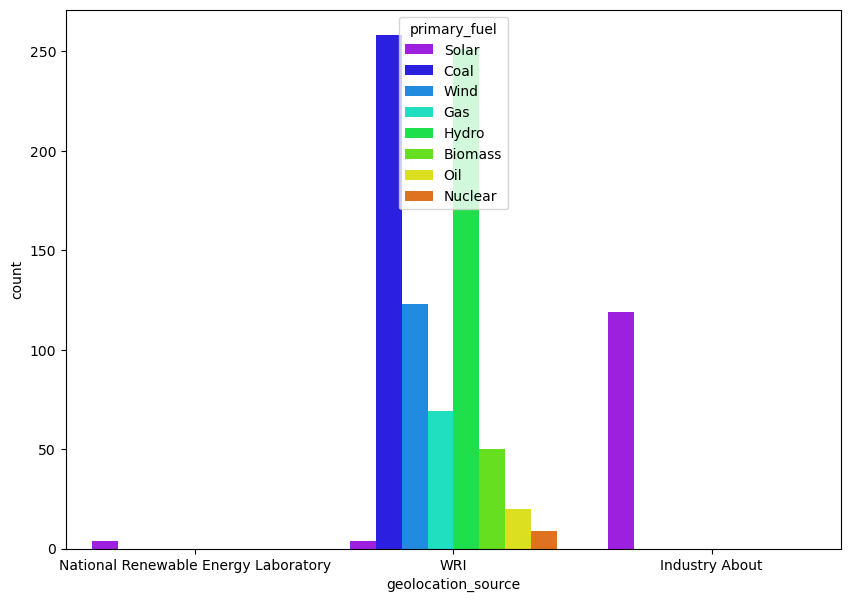

In [33]:
# count plot
plt.figure(figsize=(10,7))
sns.countplot(df['geolocation_source'], palette = 'gist_rainbow_r', hue='primary_fuel',data=df)

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:title={'center':'generation_gwh_2018'}>]],
      dtype=object)

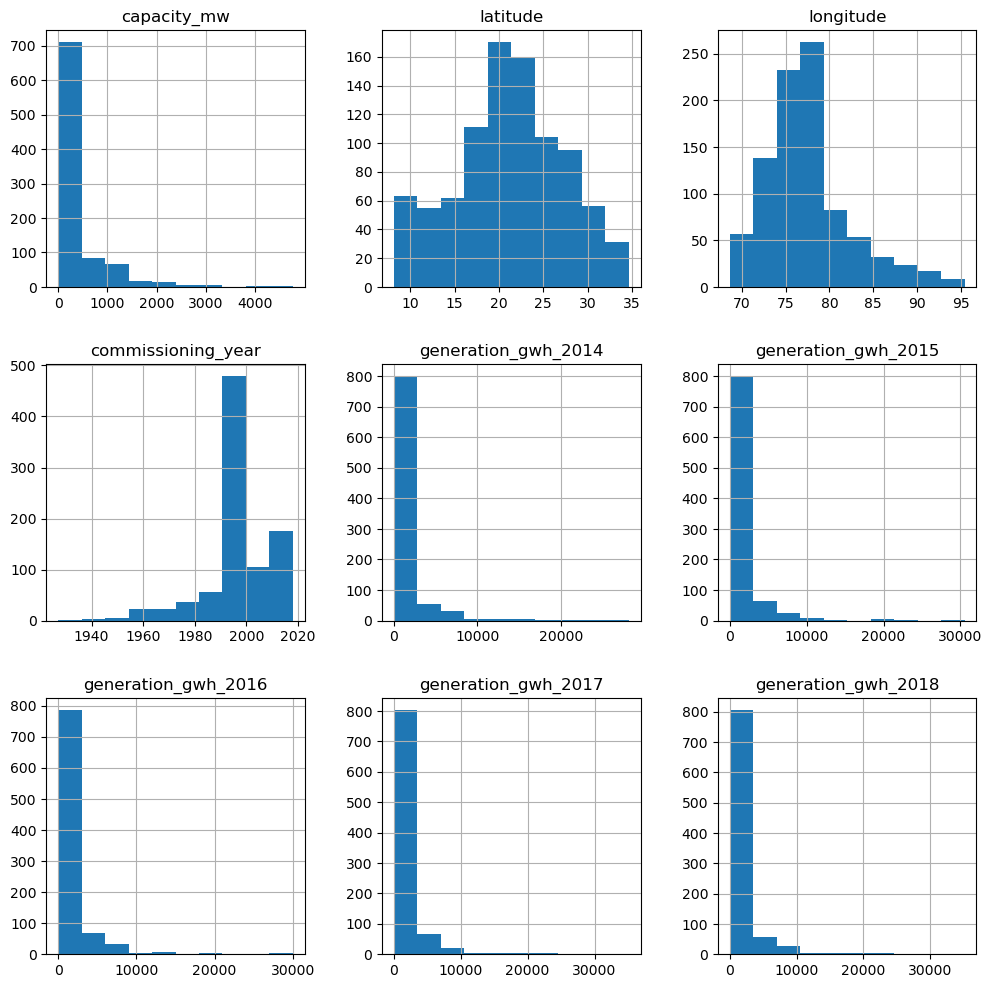

In [34]:
# histogram
df.hist(figsize=(12,12),layout=(3,3),sharex=False)

In [35]:
px.pie(df,values='capacity_mw',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)

Observations: 69.6% of Electric power generate using coal. 
    and 15.7% of electric power generate using Hydro. 
    Others are below 10%

In [36]:
px.pie(df,values='commissioning_year',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)

In [37]:
px.pie(df,values='generation_gwh_2014',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)

Observations:-
45.3% electricity generation in gigawatt-hours reported for the year 2014 using Coal fuel.
15.2% electricity generation in gigawatt-hours reported for the year 2014 using Hydro fuel.
14% electricity generation in gigawatt-hours reported for the year 2014 using Solar.
13.6% electricity generation in gigawatt-hours reported for the year 2014 using Wind.
Other fuel are below 10% electricity generation in gigawatt-hours reported for the year 2014.

In [38]:
px.pie(df,values='generation_gwh_2015',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)

Observations:-
46.3% electricity generation in gigawatt-hours reported for the year 2015 using Coal.
14.3% electricity generation in gigawatt-hours reported for the year 2015 using Hydro.
14% electricity generation in gigawatt-hours reported for the year 2015 using Solar.
13.6% electricity generation in gigawatt-hours reported for the year 2015 using Wind.
If you observe here using Coal fuel electricity generation increase in 2015 compare to 2014.

In [39]:
px.pie(df,values='generation_gwh_2016',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)

Observations:-
47.1% electricity generation in gigawatt-hours reported for the year 2016 using Coal.
14% electricity generation in gigawatt-hours reported for the year 2016 using Solar.
13.8% electricity generation in gigawatt-hours reported for the year 2016 using Hydro.
13.6% electricity generation in gigawatt-hours reported for the year 2016 using Wind.
If you observe here using Coal fuel electricity generation increase in 2016 compare to 2015.
Here using Hydro is decreases , using Coal and Solar increases compare to 2014 and 2015.

In [40]:
px.pie(df,values='generation_gwh_2017',names='primary_fuel',title='% of primary_fuel',color_discrete_sequence=px.colors.qualitative.T10)

Observations:-
47.2% electricity generation in gigawatt-hours reported for the year 2017 using Coal.
14% electricity generation in gigawatt-hours reported for the year 2017 using Solar.
13.6% electricity generation in gigawatt-hours reported for the year 2017 using Wind.
13.1% electricity generation in gigawatt-hours reported for the year 2017 using Hydro.
If you observe here using Coal fuel electricity generation increase in 2017 compare to 2014,2015 and 2016.
Using Wind is increases and Hydro is decreases

In [41]:
# checking unique of target variable
print(df['primary_fuel'].unique())
# count the unique values
print(df['primary_fuel'].value_counts())

['Solar' 'Coal' 'Wind' 'Gas' 'Hydro' 'Biomass' 'Oil' 'Nuclear']
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


In [42]:
df['primary_fuel'] = df['primary_fuel'].replace('Coal',1)
df['primary_fuel'] = df['primary_fuel'].replace('Hydro',2)
df['primary_fuel'] = df['primary_fuel'].replace('Solar',3)
df['primary_fuel'] = df['primary_fuel'].replace('Wind',4)
df['primary_fuel'] = df['primary_fuel'].replace('Biomass',5)
df['primary_fuel'] = df['primary_fuel'].replace('Oil',6)
df['primary_fuel'] = df['primary_fuel'].replace('Nuclear',7)
df['primary_fuel'] = df['primary_fuel'].replace('Gas',8)

In [43]:
df.describe().T

count         mean          std        min          25%  \
capacity_mw          907.0   326.223755   590.085456     0.0000    16.725000   
latitude             907.0    21.197918     6.079148     8.1689    17.072000   
longitude            907.0    77.464907     4.812291    68.6447    74.388900   
primary_fuel         907.0     2.886439     2.005319     1.0000     1.000000   
commissioning_year   907.0  1997.091082    13.016360  1927.0000  1997.091082   
generation_gwh_2014  907.0  2431.823590  2665.338608     0.0000  1211.362750   
generation_gwh_2015  907.0  2428.226946  2859.349132     0.0000   916.000000   
generation_gwh_2016  907.0  2467.936859  2877.890004     0.0000   896.500214   
generation_gwh_2017  907.0  2547.759305  2921.502193     0.0000   882.594850   
generation_gwh_2018  907.0  2600.804099  3030.808041     0.0000   824.842340   

                             50%          75%        max  
capacity_mw            59.200000   385.250000   4760.000  
latitude               21.281800    25.176450     34.649  
longitude              76.979200    79.206100     95.408  
primary_fuel            2.000000     4.000000      8.000  
commissioning_year   1997.091082  2003.000000   2018.000  
generation_gwh_2014  2431.823590  2431.823590  28127.000  
generation_gwh_2015  2428.226946  2428.226946  30539.000  
generation_gwh_2016  2467.936859  2467.936859  30015.000  
generation_gwh_2017  2547.759305  2547.759305  35116.000  
generation_gwh_2018  2600.804099  2600.804099  35136.000

In [44]:
#label Encoder
from sklearn.preprocessing import LabelEncoder

In [45]:
# removing target variable
df1 = df.drop('primary_fuel',axis = 1)

In [46]:
# appying label encoder
df1 = df1.apply(LabelEncoder().fit_transform)

In [47]:
# adding target varibale
df1['primary_fuel']=df['primary_fuel']

In [48]:
df1

name  gppd_idnr  capacity_mw  latitude  longitude  other_fuel1  \
0       0        657            9       731        143            2   
1       1        519          177       594        234            2   
2       2        853          121       420          8            2   
3       3          0          200       547        806            2   
4       4          1          340       423        702            2   
..    ...        ...          ...       ...        ...          ...   
902   902        491          336       176        480            2   
903   903        822           10       104        553            2   
904   904        891           81       151        311            2   
905   905        539          167       572        167            2   
906   906        876           56        32        495            2   

     commissioning_year  owner  source  url  geolocation_source  \
0                    66    229     109  128                   1   
1                    52    258     174  173                   2   
2                    52      2      21  205                   2   
3                    59      5      22   58                   2   
4                    70      5      22   58                   2   
..                  ...    ...     ...  ...                 ...   
902                  71      5      22   58                   2   
903                  52    114      77   22                   0   
904                  52      5      21  260                   2   
905                  52     91      59   82                   2   
906                  52    279      21  245                   2   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                    250                  265                  268   
1                    250                  265                  268   
2                    250                  265                  268   
3                    156                  196                  197   
4                    272                  349                  360   
..                   ...                  ...                  ...   
902                  250                    3                   99   
903                  250                  265                  268   
904                  250                  265                  268   
905                  250                  265                  268   
906                  250                  265                  268   

     generation_gwh_2017  generation_gwh_2018  primary_fuel  
0                    270                  272             3  
1                    270                  272             1  
2                    270                  272             4  
3                    176                  174             8  
4                    339                  374             1  
..                   ...                  ...           ...  
902                  193                  182             1  
903                  270                  272             3  
904                  270                  272             4  
905                  270                  272             1  
906                  270                  272             4  

[907 rows x 17 columns]

<AxesSubplot:>

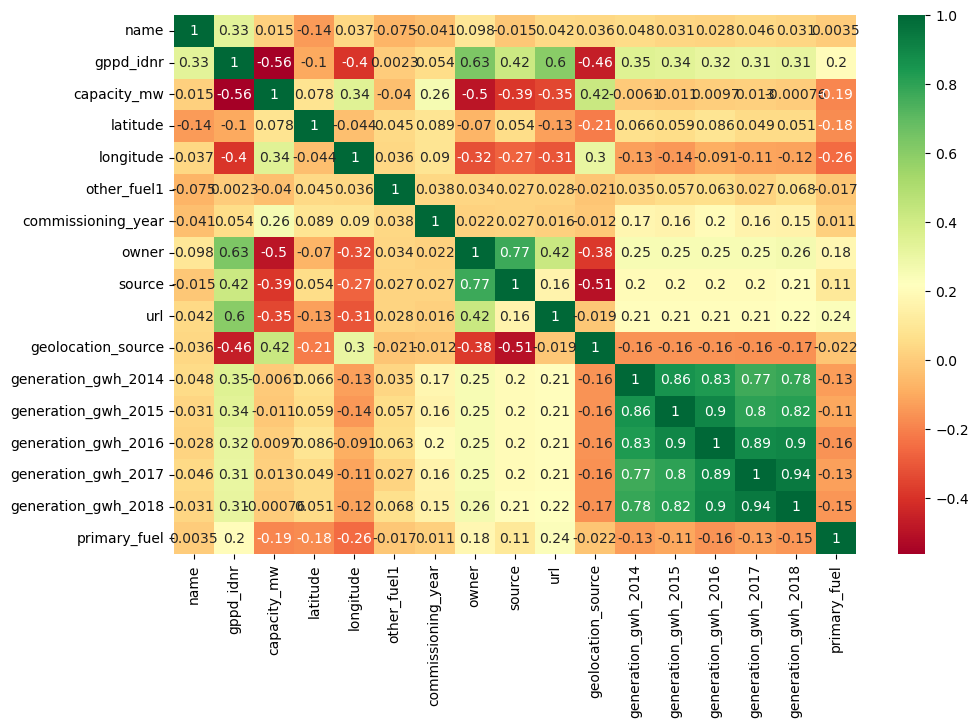

In [49]:
# checking correlation using HeatMap
plt.figure(figsize=(11,7))
sns.heatmap(df1.corr(),annot=True,cmap='RdYlGn')

In [50]:
# checking correlation
df1.corr()

name  gppd_idnr  capacity_mw  latitude  longitude  \
name                 1.000000   0.332205     0.014618 -0.137213   0.036612   
gppd_idnr            0.332205   1.000000    -0.563732 -0.100372  -0.395432   
capacity_mw          0.014618  -0.563732     1.000000  0.078279   0.344733   
latitude            -0.137213  -0.100372     0.078279  1.000000  -0.044093   
longitude            0.036612  -0.395432     0.344733 -0.044093   1.000000   
other_fuel1         -0.074663   0.002333    -0.040041  0.044511   0.036368   
commissioning_year  -0.041292   0.053931     0.260712  0.088759   0.089778   
owner                0.098075   0.630589    -0.495320 -0.069957  -0.321347   
source              -0.014640   0.416384    -0.392096  0.053914  -0.273287   
url                  0.041917   0.597080    -0.348166 -0.127709  -0.309979   
geolocation_source   0.036225  -0.464174     0.423657 -0.211405   0.304849   
generation_gwh_2014  0.047783   0.346833    -0.006148  0.066206  -0.127436   
generation_gwh_2015  0.031430   0.340109    -0.011158  0.059281  -0.142959   
generation_gwh_2016  0.028378   0.315496     0.009683  0.085754  -0.091117   
generation_gwh_2017  0.046151   0.306688     0.012681  0.048666  -0.111920   
generation_gwh_2018  0.030928   0.310391    -0.000765  0.050687  -0.118664   
primary_fuel         0.003540   0.203098    -0.189441 -0.175375  -0.255793   

                     other_fuel1  commissioning_year     owner    source  \
name                   -0.074663           -0.041292  0.098075 -0.014640   
gppd_idnr               0.002333            0.053931  0.630589  0.416384   
capacity_mw            -0.040041            0.260712 -0.495320 -0.392096   
latitude                0.044511            0.088759 -0.069957  0.053914   
longitude               0.036368            0.089778 -0.321347 -0.273287   
other_fuel1             1.000000            0.037823  0.033687  0.026590   
commissioning_year      0.037823            1.000000  0.021721  0.026775   
owner                   0.033687            0.021721  1.000000  0.769583   
source                  0.026590            0.026775  0.769583  1.000000   
url                     0.028154            0.016463  0.419773  0.160144   
geolocation_source     -0.021408           -0.012068 -0.384838 -0.505720   
generation_gwh_2014     0.034751            0.171476  0.248725  0.196322   
generation_gwh_2015     0.057197            0.159862  0.250465  0.197696   
generation_gwh_2016     0.063014            0.198602  0.250694  0.197876   
generation_gwh_2017     0.026986            0.160149  0.252934  0.199645   
generation_gwh_2018     0.067711            0.153997  0.262086  0.206869   
primary_fuel           -0.016624            0.011296  0.181082  0.106837   

                          url  geolocation_source  generation_gwh_2014  \
name                 0.041917            0.036225             0.047783   
gppd_idnr            0.597080           -0.464174             0.346833   
capacity_mw         -0.348166            0.423657            -0.006148   
latitude            -0.127709           -0.211405             0.066206   
longitude           -0.309979            0.304849            -0.127436   
other_fuel1          0.028154           -0.021408             0.034751   
commissioning_year   0.016463           -0.012068             0.171476   
owner                0.419773           -0.384838             0.248725   
source               0.160144           -0.505720             0.196322   
url                  1.000000           -0.018929             0.207868   
geolocation_source  -0.018929            1.000000            -0.158065   
generation_gwh_2014  0.207868           -0.158065             1.000000   
generation_gwh_2015  0.209323           -0.159171             0.856488   
generation_gwh_2016  0.209513           -0.159316             0.831844   
generation_gwh_2017  0.211386           -0.160740             0.765011   
generation_gwh_2018  0.219035           -0.166556             0.784

Observations :--
    capacity_mw, longitude and geolocation_source are high negative correaltion with gppd_idnr variable
    
    owner and url variables are Positive correlation with gppd_idnr variable 
    
    gppd_idnr and owner variables are High Negative  correlation with capacity_mw
    
    source is High Positive correlation with owner variable
    
    generation_gwh _ 2014,2015,2016,207,2018 ahve good correaltion with each other

In [51]:
df_target=df1.corr()

In [52]:
df_target['primary_fuel'].sort_values(ascending=False)

primary_fuel           1.000000
url                    0.235336
gppd_idnr              0.203098
owner                  0.181082
source                 0.106837
commissioning_year     0.011296
name                   0.003540
other_fuel1           -0.016624
geolocation_source    -0.022338
generation_gwh_2015   -0.107072
generation_gwh_2017   -0.127337
generation_gwh_2014   -0.132839
generation_gwh_2018   -0.153036
generation_gwh_2016   -0.160440
latitude              -0.175375
capacity_mw           -0.189441
longitude             -0.255793
Name: primary_fuel, dtype: float64

In [53]:
# scatter plot
sns.set_theme()

<AxesSubplot:xlabel='owner', ylabel='capacity_mw'>

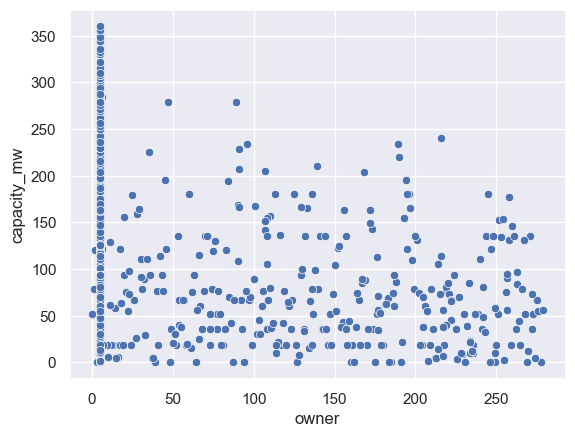

In [54]:
sns.scatterplot(df1['owner'],df1['capacity_mw'],palette='magma')

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

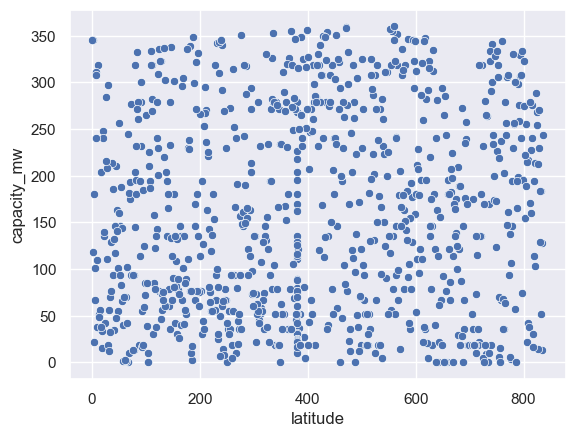

In [55]:
sns.scatterplot(df1['latitude'],df1['capacity_mw'],palette='magma')

<AxesSubplot:xlabel='longitude', ylabel='capacity_mw'>

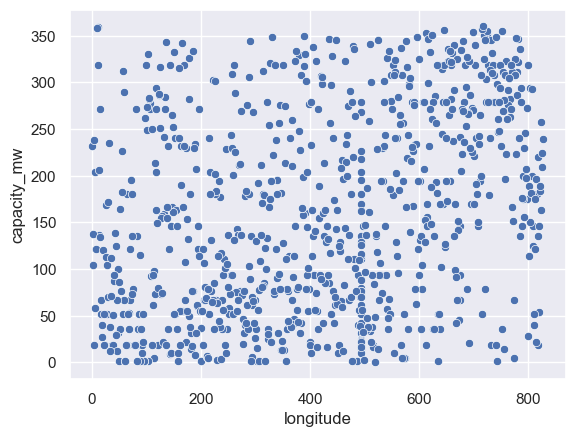

In [56]:
sns.scatterplot(df1['longitude'],df1['capacity_mw'],palette='magma')

<AxesSubplot:xlabel='source', ylabel='capacity_mw'>

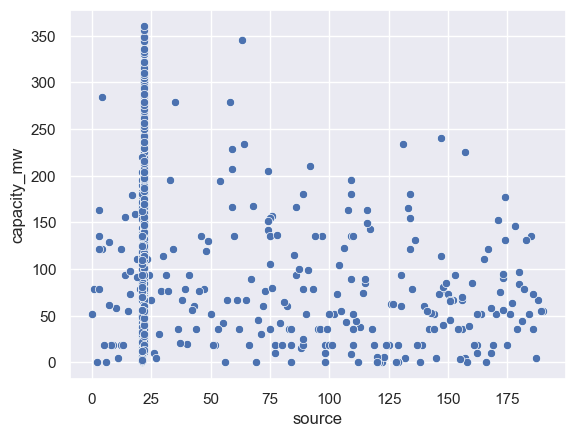

In [57]:
sns.scatterplot(df1['source'],df1['capacity_mw'],palette='magma')

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

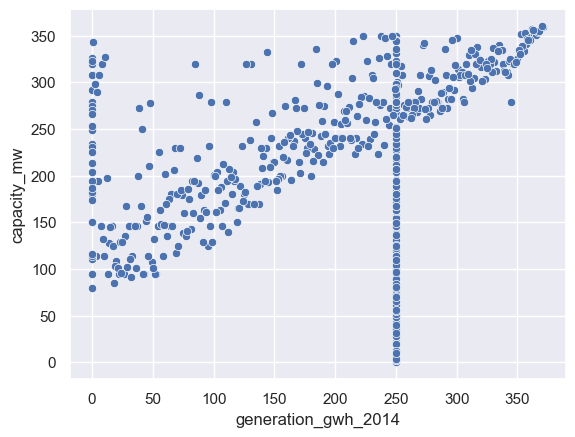

In [58]:
sns.scatterplot(df1['generation_gwh_2014'],df1['capacity_mw'],palette='magma')

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

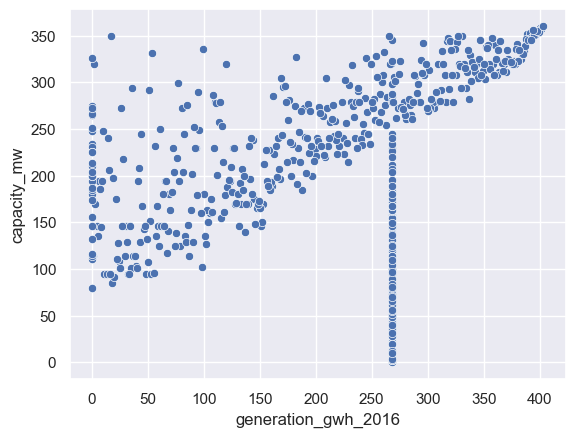

In [59]:
sns.scatterplot(df1['generation_gwh_2016'],df1['capacity_mw'],palette='magma')

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

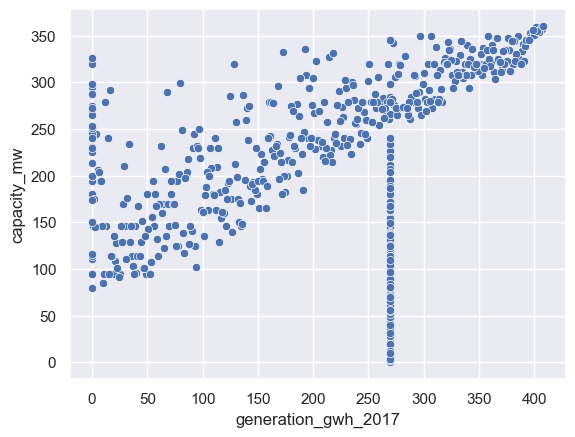

In [60]:
sns.scatterplot(df1['generation_gwh_2017'],df1['capacity_mw'],palette='magma')

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='capacity_mw'>

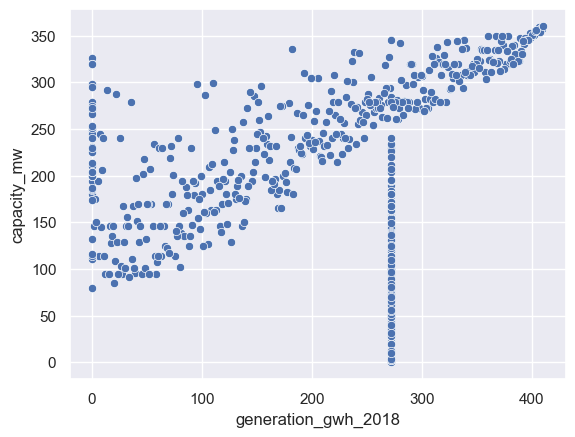

In [61]:
sns.scatterplot(df1['generation_gwh_2018'],df1['capacity_mw'],palette='magma')

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

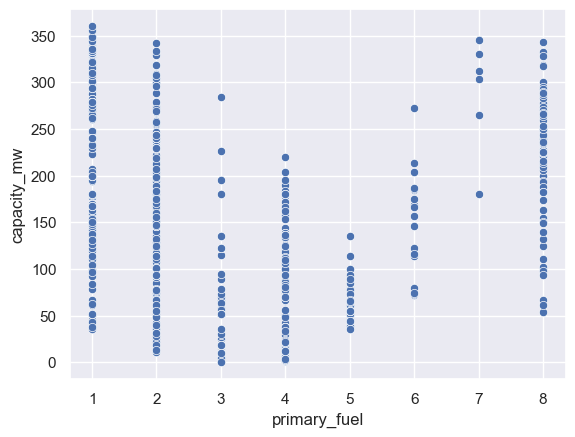

In [62]:
sns.scatterplot(df1['primary_fuel'],df1['capacity_mw'],palette='magma')

Coal , Hydra, Gas are primary fuel to high capacity mega watts electricity generation

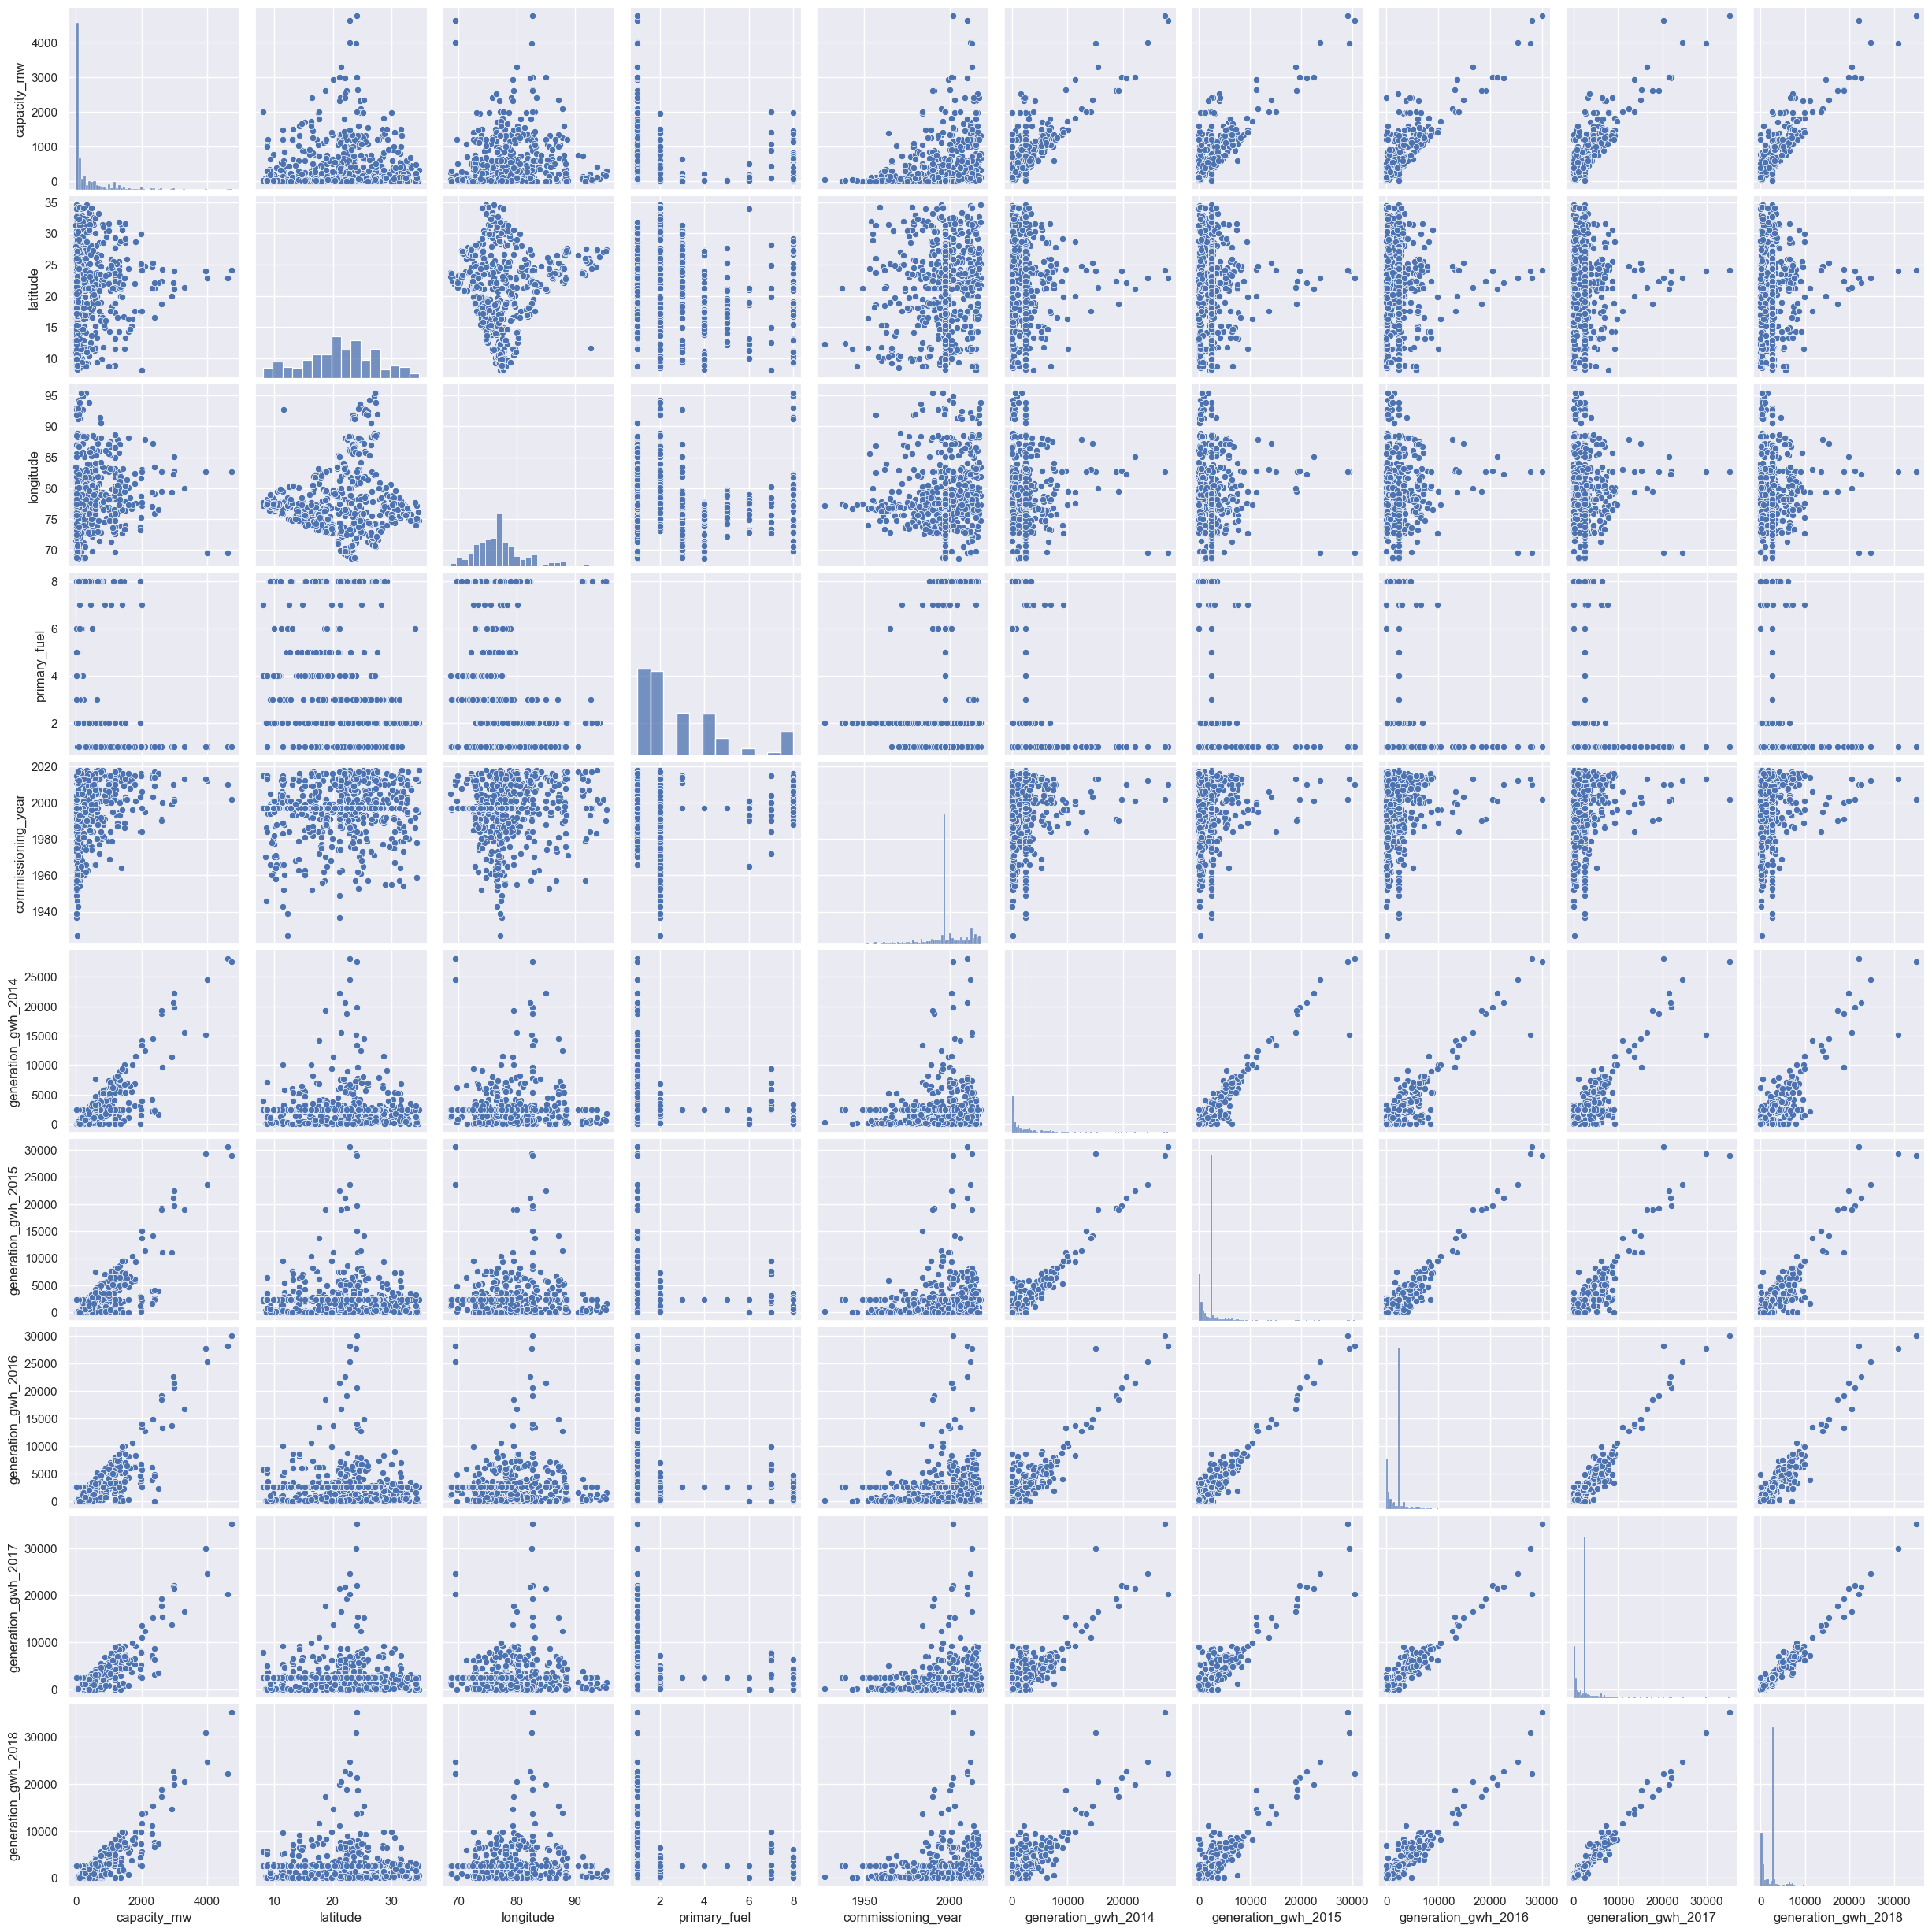

In [63]:
sns.pairplot(df)

In [64]:
# dataset is imbalanced make it balanced using SMOTE
dfx = df1.iloc[:,0:-1]
dfy = df1.iloc[:,-1]

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
smt = SMOTE()

In [67]:
train_x,train_y=smt.fit_resample(dfx,dfy)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

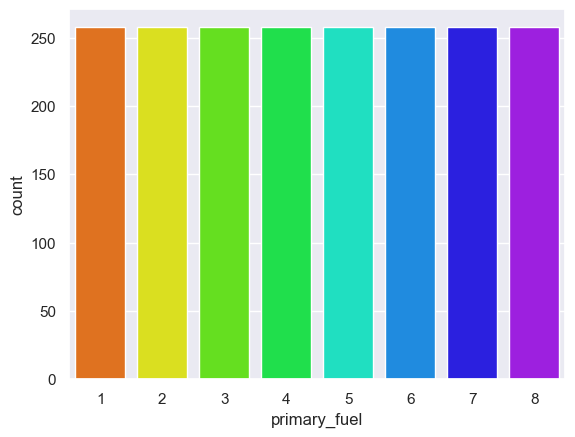

In [68]:
# count plot for train_y
sns.countplot(train_y,palette = 'gist_rainbow')

In [69]:
df2 = train_x


In [70]:
df2['primary_fuel'] = train_y

In [71]:
df2.head()

name  gppd_idnr  capacity_mw  latitude  longitude  other_fuel1  \
0     0        657            9       731        143            2   
1     1        519          177       594        234            2   
2     2        853          121       420          8            2   
3     3          0          200       547        806            2   
4     4          1          340       423        702            2   

   commissioning_year  owner  source  url  geolocation_source  \
0                  66    229     109  128                   1   
1                  52    258     174  173                   2   
2                  52      2      21  205                   2   
3                  59      5      22   58                   2   
4                  70      5      22   58                   2   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  250                  265                  268   
1                  250                  265                  268   
2                  250                  265                  268   
3                  156                  196                  197   
4                  272                  349                  360   

   generation_gwh_2017  generation_gwh_2018  primary_fuel  
0                  270                  272             3  
1                  270                  272             1  
2                  270                  272             4  
3                  176                  174             8  
4                  339                  374             1

In [72]:
df2.shape

(2064, 17)

name                      AxesSubplot(0.125,0.747241;0.168478x0.132759)
gppd_idnr              AxesSubplot(0.327174,0.747241;0.168478x0.132759)
capacity_mw            AxesSubplot(0.529348,0.747241;0.168478x0.132759)
latitude               AxesSubplot(0.731522,0.747241;0.168478x0.132759)
longitude                 AxesSubplot(0.125,0.587931;0.168478x0.132759)
other_fuel1            AxesSubplot(0.327174,0.587931;0.168478x0.132759)
commissioning_year     AxesSubplot(0.529348,0.587931;0.168478x0.132759)
owner                  AxesSubplot(0.731522,0.587931;0.168478x0.132759)
source                    AxesSubplot(0.125,0.428621;0.168478x0.132759)
url                    AxesSubplot(0.327174,0.428621;0.168478x0.132759)
geolocation_source     AxesSubplot(0.529348,0.428621;0.168478x0.132759)
generation_gwh_2014    AxesSubplot(0.731522,0.428621;0.168478x0.132759)
generation_gwh_2015        AxesSubplot(0.125,0.26931;0.168478x0.132759)
generation_gwh_2016     AxesSubplot(0.327174,0.26931;0.168478x0.

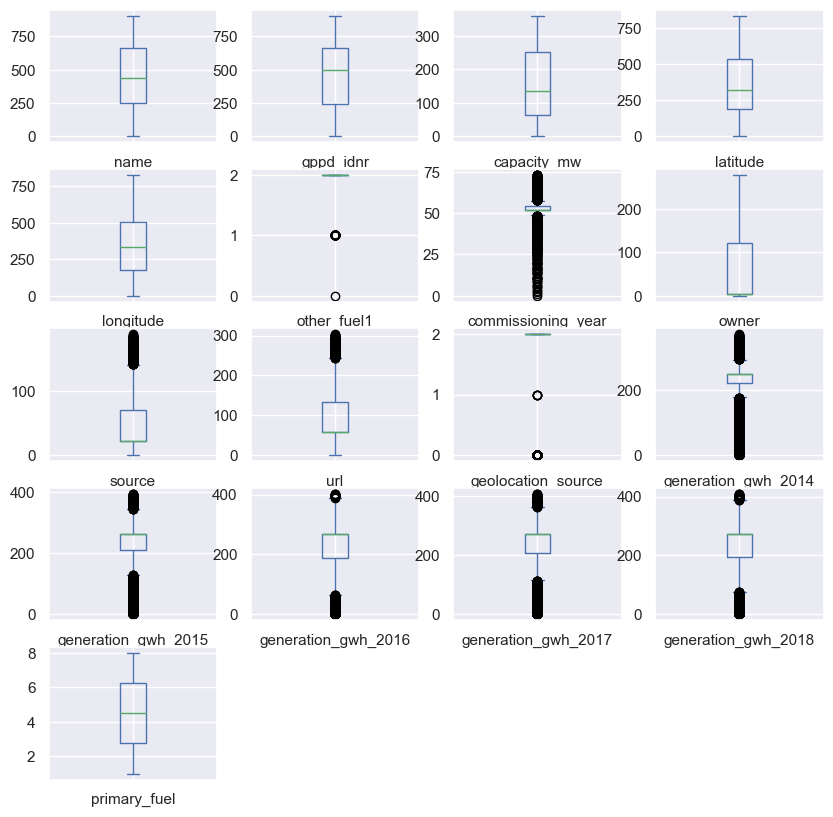

In [73]:
# checking outliers
df2.plot(kind = 'box', subplots = True, layout=(5,4), figsize = (10,10))

In [74]:
# removing outliers
from scipy.stats import zscore
z = np.abs(zscore(df2))

In [75]:
threshold =3
print(np.where(z>3))

(array([  76,   78,   90,  169,  170,  202,  219,  221,  222,  254,  261,
        294,  321,  342,  371,  377,  444,  454,  469,  475,  478,  479,
        484,  495,  522,  531,  538,  541,  573,  583,  588,  592,  601,
        619,  621,  649,  677,  694,  706,  709,  713,  728,  781,  807,
        811,  813,  817,  817,  848, 1391, 1396, 1403, 1404, 1405, 1406,
       1415, 1417, 1422, 1425, 1426, 1432, 1433, 1457, 1459, 1465, 1471,
       1472, 1473, 1477, 1484, 1489, 1493, 1497, 1504, 1507, 1507, 1523,
       1524, 1528, 1537, 1541, 1548, 1549, 1552, 1556, 1557, 1565, 1566,
       1568, 1579, 1583, 1585, 1586, 1593, 1614, 1616, 1617, 1624, 1624],
      dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5

In [76]:
df_new = df2[(z<3).all(axis=1)]

In [77]:
# after removing outliers
df_new.shape

(1968, 17)

# VIF(Variance Inflation Factor)

In [78]:
x = df_new.drop('primary_fuel', axis =1)


In [79]:
y = df_new['primary_fuel']

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
def vif():
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(0,x.shape[1])]
    return vif


In [82]:
vif()

Variables  VIF Factor
0                  name    1.436450
1             gppd_idnr    5.282530
2           capacity_mw    2.767475
3              latitude    1.213307
4             longitude    1.324514
5           other_fuel1   97.111018
6    commissioning_year    1.174044
7                 owner    4.630660
8                source    3.597835
9                   url    2.104604
10   geolocation_source    1.943241
11  generation_gwh_2014    5.125245
12  generation_gwh_2015    8.504799
13  generation_gwh_2016   11.654980
14  generation_gwh_2017    6.718410
15  generation_gwh_2018   10.972200

In [83]:
#latitude,longitude,name,geolocation_source,commissioning_year as same VIF Factor , so drop latitude,longitude and name
x.drop('latitude',axis=1,inplace=True)
x.drop('longitude',axis=1,inplace=True)
x.drop('name',axis=1,inplace=True)
#owner and generation_gwh_2014 as same VIF Factor so,drop owner
x.drop('owner',axis=1,inplace=True)

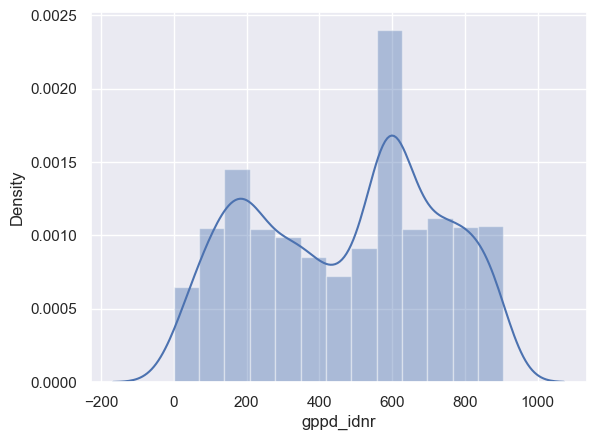

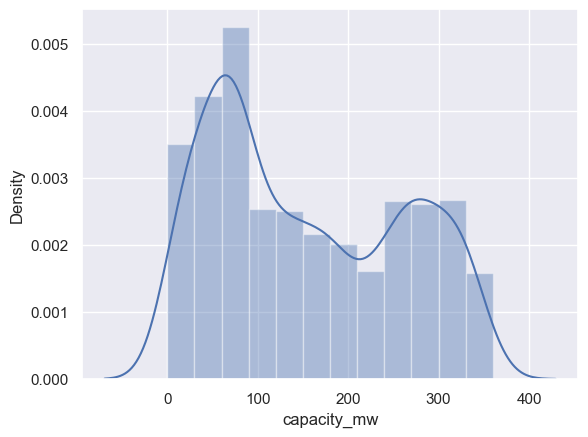

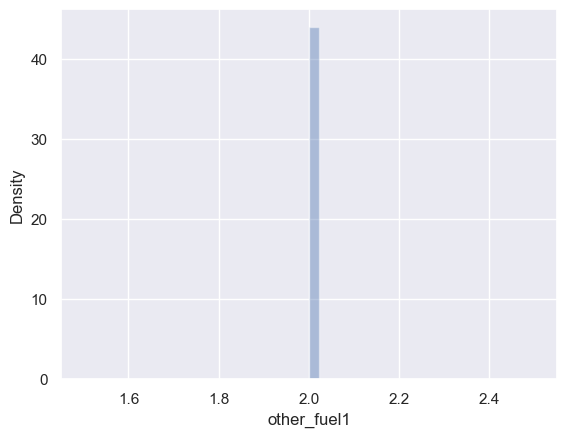

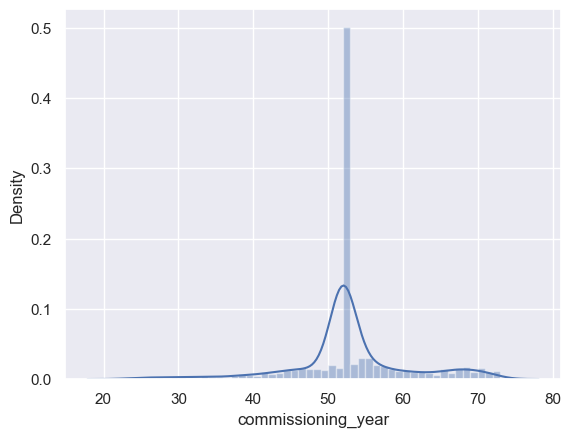

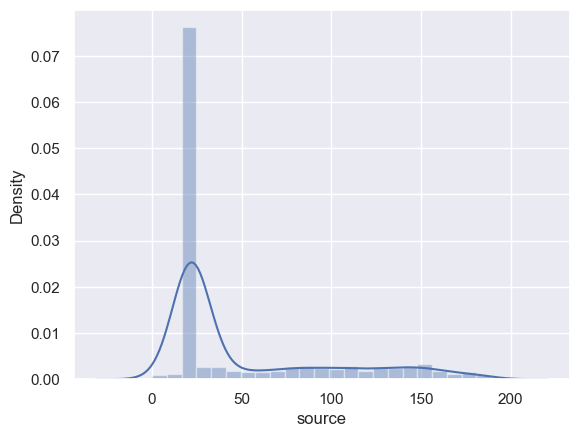

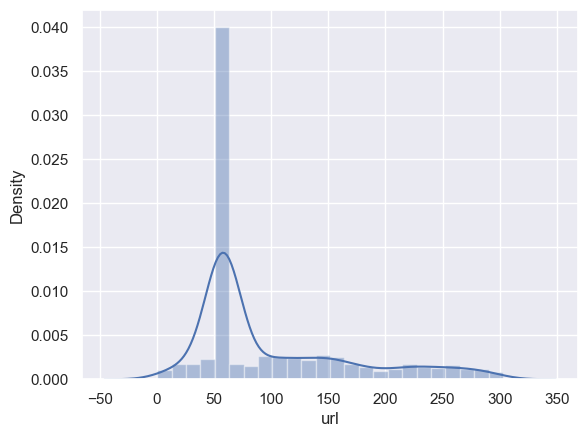

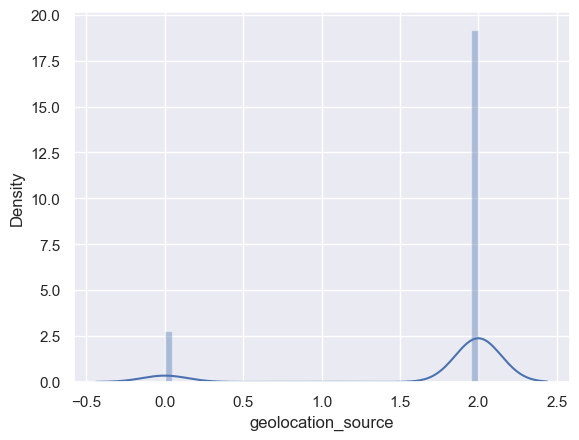

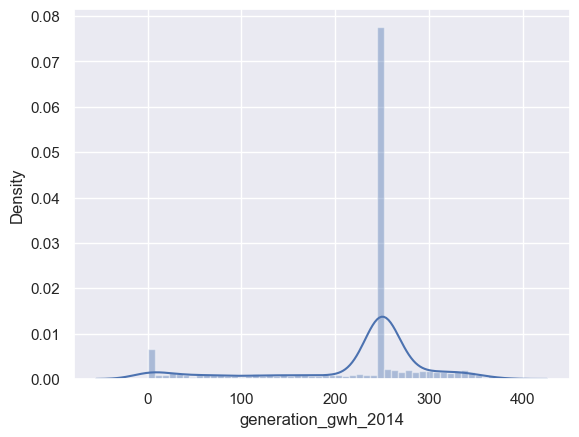

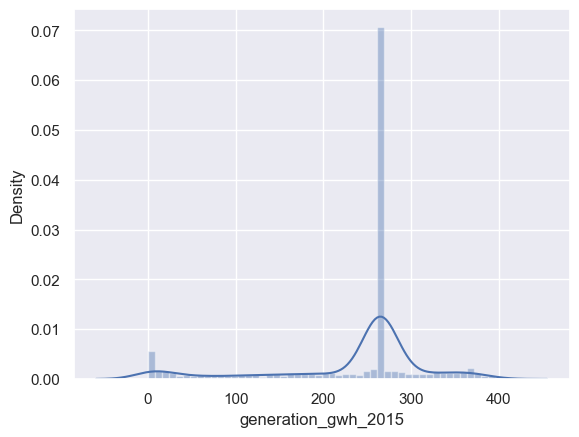

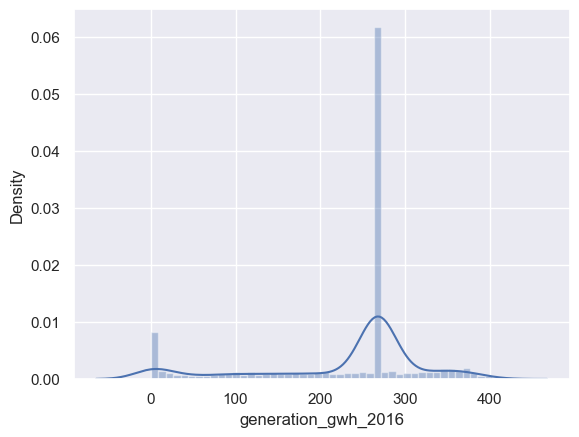

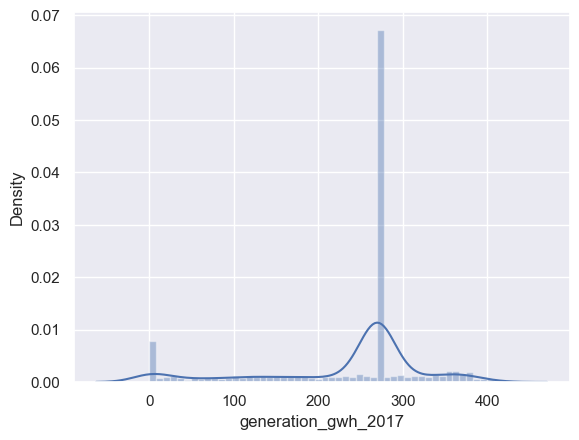

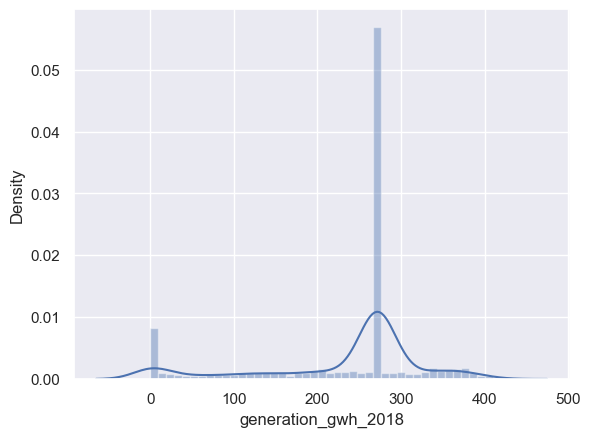

In [84]:
# Cheking Outliers
for i  in x.columns:
    plt.figure()
    sns.distplot(x[i])

In [85]:
x.skew().sort_values(ascending=False)

source                 1.375386
url                    1.278716
capacity_mw            0.323171
other_fuel1            0.000000
gppd_idnr             -0.119683
commissioning_year    -0.205056
generation_gwh_2016   -1.189771
generation_gwh_2018   -1.217322
generation_gwh_2017   -1.219166
generation_gwh_2015   -1.352297
generation_gwh_2014   -1.457289
geolocation_source    -2.234806
dtype: float64

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scale = MinMaxScaler()

In [88]:
x = scale.fit_transform(x)

# Model Selection

In [89]:
x.shape

(1968, 12)

In [90]:
y.shape

(1968,)

In [91]:
#  classification models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# model selction
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

In [92]:
lg = LogisticRegression()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
svc = SVC()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

In [93]:
list_models = [lg,mnb,dtc,knc,svc,rfc,abc,gbc]

In [94]:
# Logistics Regression
def confusion_plot():
    print('accuracy_score:-', accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot = True, fmt = 'd', cmap ='YlOrBr', square = True)
    plt.xlabel('predicted')
    plt.show()

In [95]:
maxacc = 0
macrn = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    lg.fit(x_train,y_train)
    pred = lg.predict(x_test)
    score = accuracy_score(pred,y_test)
    if score > maxacc:
        maxacc =score
        maxrn = i
        
print('accuracy_score:-', maxacc, 'Random state:-', maxrn)

accuracy_score:- 0.751269035532995 Random state:- 83


accuracy_score:- 0.7157360406091371
              precision    recall  f1-score   support

           1       0.39      0.49      0.43        53
           2       0.41      0.62      0.50        47
           3       0.99      1.00      0.99        80
           4       1.00      0.84      0.92        96
           5       0.95      0.61      0.74       115
           6       0.39      0.74      0.51        35
           7       0.89      0.70      0.78       104
           8       0.55      0.62      0.58        61

    accuracy                           0.72       591
   macro avg       0.70      0.70      0.68       591
weighted avg       0.78      0.72      0.73       591



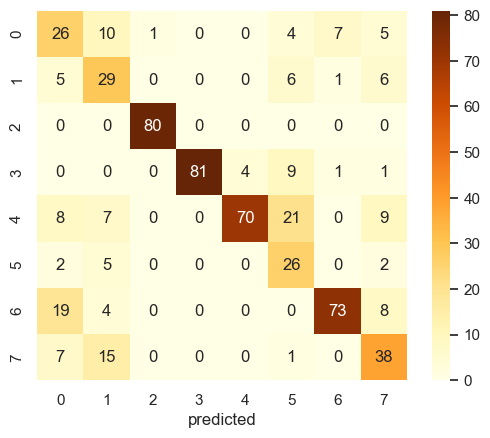

In [96]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =.30, random_state =64)
lg.fit(x_train,y_train)
pred = lg.predict(x_test)
confusion_plot()

In [97]:
# multinomialNB
def confusion_plot():
    print('accuaracy_score:-', accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot =True, fmt = 'd', cmap= 'gist_rainbow',square = True)
    plt.xlabel("predicted")
    plt.show()

In [98]:
maxacc = 0
macrn = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state =i)
    mnb.fit(x_train,y_train)
    pred = mnb.predict(x_test)
    score = accuracy_score(pred, y_test)
    if score>maxacc:
        maxacc = score
        maxrn = i
print('accuracy_score:-', maxacc,'Random state:-', maxrn )

accuracy_score:- 0.6243654822335025 Random state:- 25


accuaracy_score:- 0.6209813874788495
              precision    recall  f1-score   support

           1       0.39      0.36      0.37        75
           2       0.00      0.00      0.00         0
           3       0.96      1.00      0.98        72
           4       1.00      0.97      0.98        97
           5       0.91      0.58      0.71       126
           6       0.00      0.00      0.00         0
           7       0.79      0.58      0.67       103
           8       0.53      0.35      0.42       118

    accuracy                           0.62       591
   macro avg       0.57      0.48      0.52       591
weighted avg       0.77      0.62      0.68       591



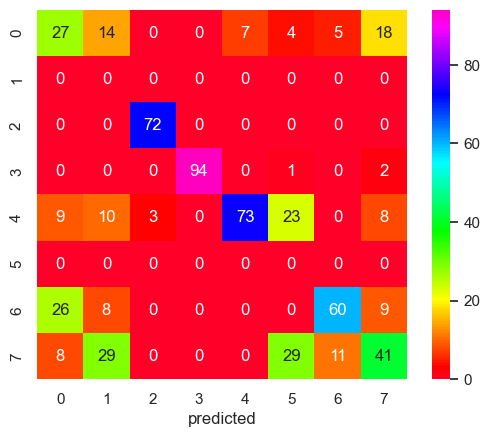

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= .30,random_state = 32)
mnb.fit(x_train,y_train)
pred  = mnb.predict(x_test)
confusion_plot()

In [100]:
# Decison TRee Classifoer
def confusion_plot():
    print("accuracy_score:-",accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix,annot=True,fmt="d", cmap= "coolwarm", square = True)
    plt.xlabel("predicted")
    plt.show()

In [101]:
maxacc = 0
maxrn = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = i)
    dtc.fit(x_train,y_train)
    pred = dtc.predict(x_test)
    score = accuracy_score(pred,y_test)
    if score > maxacc:
        maxacc  =score
        maxrn = i
        print('accuracy_score:-', maxacc, 'Random_ state:-', maxrn)

accuracy_score:- 0.8460236886632826 Random_ state:- 1
accuracy_score:- 0.8477157360406091 Random_ state:- 3
accuracy_score:- 0.8527918781725888 Random_ state:- 5
accuracy_score:- 0.8747884940778342 Random_ state:- 6
accuracy_score:- 0.883248730964467 Random_ state:- 32
accuracy_score:- 0.8917089678510999 Random_ state:- 84


accuracy_score:- 0.8324873096446701
              precision    recall  f1-score   support

           1       0.57      0.74      0.65        68
           2       0.72      0.60      0.66        73
           3       1.00      0.98      0.99        86
           4       1.00      1.00      1.00        75
           5       0.94      0.86      0.90        71
           6       0.95      0.88      0.91        60
           7       0.94      0.90      0.92        82
           8       0.61      0.67      0.64        76

    accuracy                           0.83       591
   macro avg       0.84      0.83      0.83       591
weighted avg       0.84      0.83      0.84       591



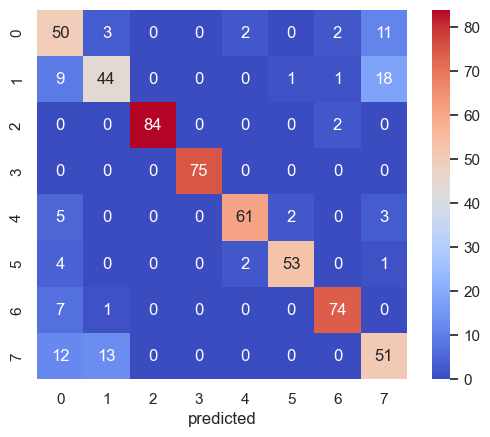

In [102]:
x_train ,x_test,y_train,y_test = train_test_split(x,y,test_size = .30,random_state = 10)
dtc.fit(x_train,y_train)
pred = dtc.predict(x_test)
confusion_plot()

In [103]:
# K NeighborsClassifer
def confusion_plot():
    print("accuracy_score:-", accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred, y_test)
    sns.heatmap(matrix , annot =True, fmt ="d", cmap ="icefire", square =True)
    plt.xlabel("predicted")
    plt.show()

In [104]:
maxacc = 0
maxrn =0
 
for i in range(1,100):
    
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.30,random_state =i)
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    score = accuracy_score(pred,y_test)
    if score>maxacc:
        
        maxacc = score
        maxrn = i
        print("accuracy_score:-", maxacc,'Random state:-', maxrn)

accuracy_score:- 0.8358714043993232 Random state:- 1
accuracy_score:- 0.8460236886632826 Random state:- 4
accuracy_score:- 0.8510998307952623 Random state:- 5
accuracy_score:- 0.8629441624365483 Random state:- 8
accuracy_score:- 0.8663282571912013 Random state:- 22


accuracy_score:- 0.856175972927242
              precision    recall  f1-score   support

           1       0.55      0.74      0.63        47
           2       0.66      0.80      0.72        59
           3       0.98      1.00      0.99        79
           4       1.00      1.00      1.00        82
           5       0.94      0.87      0.91        78
           6       0.86      0.79      0.82        76
           7       0.99      0.90      0.94        91
           8       0.78      0.67      0.72        79

    accuracy                           0.86       591
   macro avg       0.84      0.85      0.84       591
weighted avg       0.87      0.86      0.86       591



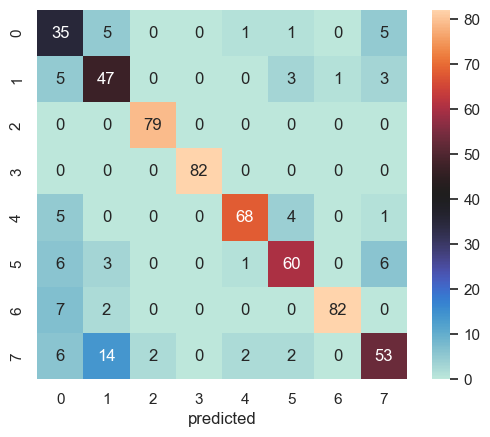

In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30,random_state=57)
knc.fit(x_train,y_train)
pred =knc.predict(x_test)
confusion_plot()

In [106]:
# Suport Vector Classifer
def confusion_plot():
    print('accuracy_score:-', accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred, y_test)
    sns.heatmap(matrix, annot=True, fmt = "d", cmap= "Greens", square = True)
    plt.xlabel("predicted")
    plt.show()

In [107]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8003384094754653 Random state:- 50


accuracy_score:- 0.7935702199661591
              precision    recall  f1-score   support

           1       0.35      0.78      0.49        36
           2       0.48      0.89      0.63        36
           3       0.99      1.00      0.99        82
           4       1.00      0.96      0.98        71
           5       0.99      0.81      0.89        99
           6       0.72      0.67      0.70        58
           7       1.00      0.68      0.81       131
           8       0.72      0.65      0.68        78

    accuracy                           0.79       591
   macro avg       0.78      0.80      0.77       591
weighted avg       0.86      0.79      0.81       591



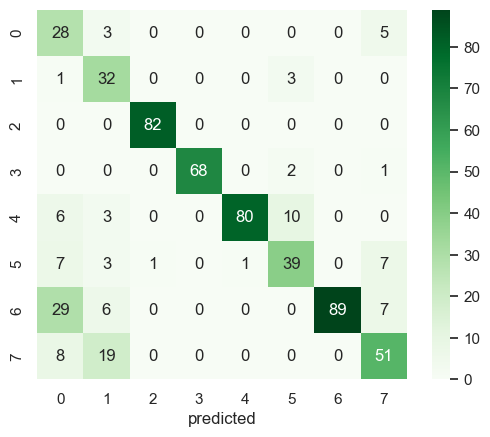

In [108]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30,random_state =83)
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
confusion_plot()

In [109]:
def confusion_plot():
    print("accuracy_score:-", accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot =True, fmt ="d", cmap="viridis", square =True)
    plt.xlabel ("predicted")
    plt.show()

In [110]:
maxacc =0
maxrn =0

for i in range(1,100):
    x_trani,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rfc.fit(x_train,y_train)

    pred = rfc.predict(x_test)
    score = accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc = score
        maxrn = i
        print("accuracy_score:-", maxacc, 'Random state:- ', maxrn)

accuracy_score:- 0.11336717428087986 Random state:-  1
accuracy_score:- 0.1404399323181049 Random state:-  2
accuracy_score:- 0.1455160744500846 Random state:-  23
accuracy_score:- 0.16074450084602368 Random state:-  37
accuracy_score:- 0.16243654822335024 Random state:-  79
accuracy_score:- 0.8900169204737732 Random state:-  83


accuracy_score:- 0.8900169204737732
              precision    recall  f1-score   support

           1       0.66      0.80      0.72        59
           2       0.66      0.88      0.76        51
           3       1.00      1.00      1.00        77
           4       1.00      1.00      1.00        91
           5       0.96      0.90      0.93        87
           6       0.95      0.89      0.92        66
           7       1.00      0.88      0.93        73
           8       0.84      0.75      0.79        87

    accuracy                           0.89       591
   macro avg       0.89      0.89      0.88       591
weighted avg       0.90      0.89      0.89       591



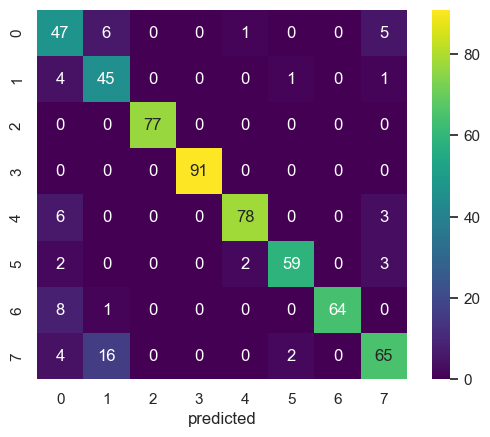

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state =5)
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
confusion_plot()

In [112]:
# AdaBoostClassifier
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='mako', square=True)
    plt.xlabel("predicted")
    plt.show()


In [113]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    abc.fit(x_train,y_train)
    pred=abc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)


accuracy_score:- 0.5617597292724196 Random state:- 64


accuracy_score:- 0.5076142131979695
              precision    recall  f1-score   support

           1       0.32      0.24      0.27        88
           2       0.34      0.60      0.43        35
           3       0.98      1.00      0.99        79
           4       1.00      0.98      0.99        83
           5       1.00      0.29      0.45       282
           6       0.00      0.00      0.00         0
           7       0.18      0.67      0.28        24
           8       0.00      0.00      0.00         0

    accuracy                           0.51       591
   macro avg       0.48      0.47      0.43       591
weighted avg       0.82      0.51      0.56       591



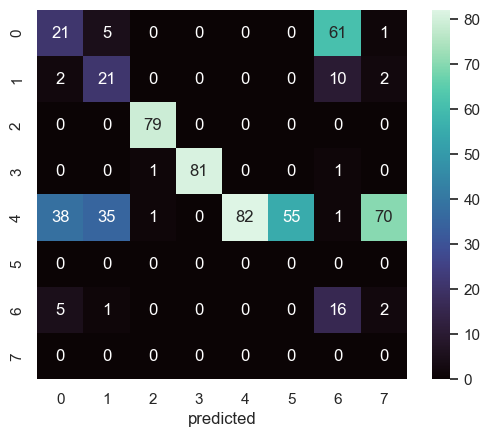

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=37)
abc.fit(x_train,y_train)
pred=abc.predict(x_test)
confusion_plot()

In [119]:
# GradientBoostingClassifier

def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='magma', square=True)
    plt.xlabel("predicted")
    plt.show()

In [120]:
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    gbc.fit(x_train,y_train)
    pred=gbc.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.9137055837563451 Random state:- 84


accuracy_score:- 0.8984771573604061
              precision    recall  f1-score   support

           1       0.69      0.83      0.75        58
           2       0.79      0.80      0.79        60
           3       0.99      1.00      0.99        74
           4       1.00      0.99      0.99        95
           5       0.93      0.96      0.94        77
           6       0.95      0.84      0.89        64
           7       0.96      0.90      0.93        81
           8       0.85      0.80      0.83        82

    accuracy                           0.90       591
   macro avg       0.89      0.89      0.89       591
weighted avg       0.90      0.90      0.90       591



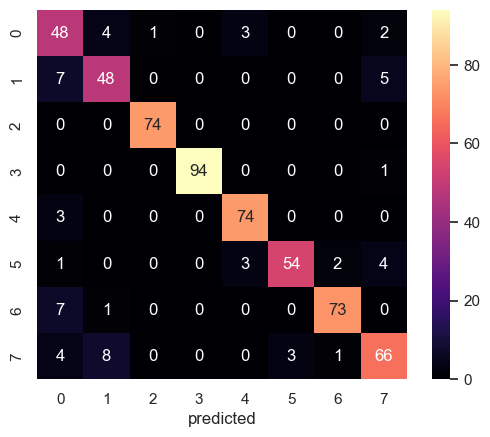

In [121]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size = .30, random_state=32)
gbc.fit(x_train,y_train)
pred = gbc.predict(x_test)
confusion_plot()

In [122]:
# Cross Validation
for model in list_model:
    score =cross_val_score(model,x,y,cv =5)
    print(model)
    print(score)
    print(score.mean())

NameError: name 'list_model' is not defined

In [ ]:
def confusion_plot():
    print('accuracy_score:-',accuracy_score(pred,y_test))
    print(classification_report(pred,y_test))
    matrix = confusion_matrix(pred,y_test)
    sns.heatmap(matrix, annot=True, fmt="d", cmap='Greens', square=True)
    plt.xlabel("predicted")
    plt.show()

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=5)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
confusion_plot()


In [ ]:
# Hyperparameters for a model
random_forest_params={'max_features': ['auto', 'sqrt', 'log2'],'criterion' :['gini', 'entropy']}


In [ ]:
for i in range(3,10):
    rfc_grid = GridSearchCV(rfc, random_forest_params, cv=i)
    rfc_grid.fit(x_train,y_train)
    print('Best score:', rfc_grid.best_score_)
    print('Best score:', rfc_grid.best_params_)
    print('Best score:', rfc_grid.best_estimator_)


In [ ]:

rfc_grid = GridSearchCV(rfc, random_forest_params, cv=10)
rfc_grid.fit(x_train,y_train)
print('Best score:', rfc_grid.best_score_)
print('Best score:', rfc_grid.best_params_)
print('Best score:', rfc_grid.best_estimator_)


In [ ]:
pred_prob=rfc_grid.best_estimator_.predict_proba(x_test)

In [ ]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class=8

In [ ]:
for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)

In [ ]:
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='orange', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='pink', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='blue', label='Class 6 vs Rest')
plt.plot(fpr[7], tpr[7], linestyle='--',color='red', label='Class 7 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [ ]:

import joblib

In [ ]:
#save the model
joblib.dump(rfc_grid.best_estimator_,'global_power_plant_rfc.obj')